In [145]:
%matplotlib inline

import pandas as pd  # Dataframes
import numpy as np   # Numerical analysis
import seaborn as sns # Plotting
import matplotlib.pyplot as plt # More plotting


# 1. Acquire data
df = pd.read_csv("https://raw.githubusercontent.com/ga-students/DAT-NYC-37/master/lessons/lesson-07/assets/dataset/bikeshare.csv")

## Always good to check proper loading
# 2. Preview data
df.head()

# Checks:
## 1. Missing values
## 2. Proper formatting/encoding (dates, numbers, etc. are as they shuold be)
## 3. Sanity: Do the values make sense
## 3. Extra/redundant columns: dteday

print df.dtypes

# Remove:
#  count
#  registered
#  dteday
#  instant

# --- 

# Specify target: casual

df[['cnt', ]]

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


,cnt
0,16
1,40
2,32
3,13
4,1
5,1
6,2
7,3
8,8
9,14


In [56]:
features = df.drop(['cnt', 'registered', 'casual', 'dteday', 'instant', 'temp'], axis=1)

target = df['casual']

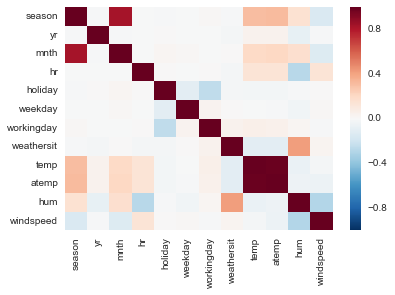

In [33]:
# TODO: Remove temp or atemp?
# sns.heatmap(features.corr())

In [57]:
df.select_dtypes(np.number)

sns.pairplot(df)

TypeError: include and exclude must both be non-string sequences

In [58]:
df.select_dtypes(include=[np.number]).head(1000)

# ax = plt.scatter(df[['casual']], df[['registered']], alpha=1)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [73]:
import sklearn

from sklearn import feature_selection

X = features
y = target

[f_scores, p_values] = feature_selection.f_regression(X, y)

non_encoded_features = pd.DataFrame({
        "columns": X.columns,
        "F Scores": f_scores,
        "P Values": p_values
    })
 
## Candidate predictors:
# atemp
# hum
# hr

,F Scores,P Values,columns
0,254.771874,6.011151e-57,season
1,361.614212,8.099088e-80,yr
2,81.819045,1.645466e-19,mnth
3,1733.777141,0.000000e+00,hr
4,17.329320,3.158140e-05,holiday
5,18.625340,1.599713e-05,weekday
6,1730.496815,0.000000e+00,workingday
7,414.456811,4.525012e-91,weathersit
8,4513.593048,0.000000e+00,atemp
9,2379.210774,0.000000e+00,hum


In [146]:
from sklearn import linear_model

# 1. Defined the model
# 2. Fit the model
model = linear_model.LinearRegression()

X[['atemp']].shape

# Check R-squared for various fits

model.fit(X[['atemp']], y)
print model.score(X[['atemp']], y)

model.fit(X[['atemp', 'hum']] , y)
print model.score(X[['atemp', 'hum']], y)

model.fit(X[['atemp', 'windspeed']] , y)
print model.score(X[['atemp', 'windspeed']], y)

model.fit(X[['atemp', 'windspeed', 'hum']] , y)
print model.score(X[['atemp', 'windspeed', 'hum']], y)

0.206188705733
0.311093509696
0.220307709708
0.311698099897


In [147]:
month_dummies = pd.get_dummies(X['mnth'], prefix="mnth", drop_first=True)

X_dummy = pd.concat([
        X, 
        month_dummies,
    ], axis=1)

X_dummy_drop = X_dummy.drop(['mnth'], axis=1)

result = model.fit(X_dummy_drop, y)
model.score(X_dummy_drop, y)

print model.coef_

X_dummy_drop.head()

[   0.66389197    9.71440815    1.06848255  -13.06510266    0.86663436
  -35.60473726    1.63128034  155.16567766  -73.75213192    1.46737345
   -6.20808305    2.72811812    1.29008771    1.30187855  -17.2922672
  -26.44217926  -16.6145205    -2.58490684    3.94063034    0.34428282
   -1.2444393 ]


,season,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,0,0,0,6,0,1,0.2879,0.81,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,0,6,0,1,0.2727,0.80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,2,0,6,0,1,0.2727,0.80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,3,0,6,0,1,0.2879,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,4,0,6,0,1,0.2879,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
